# This is a program used to separate a image's foreground and background in Python, and calculate the corresponding color values (Hue, Saturation, Value) for foreground and background colors.

# The following sections are: defined functions, three example images to show the effect of defined functions for color separation.

In [ ]:
#see https://www.analyticsvidhya.com/blog/2019/03/opencv-functions-computer-vision-python/
#https://stackoverflow.com/questions/58831690/how-to-measure-the-saturation-of-an-image
#https://www.pyimagesearch.com/2017/06/05/computing-image-colorfulness-with-opencv-and-python/

import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
from imutils import build_montages
from imutils import paths
import numpy as np
import argparse
import imutils
import glob
import os
import pandas as pd
from pprint import pprint
from pandas import DataFrame
import argparse

In [ ]:
# Connect the current doc to google drive to load images
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Unzip the zip file of pics
!unzip gdrive/My\Drive/pics.zip

In [ ]:
# Load images from Google Drive, totally 22240 images
file = glob.glob("/content/pics/*.png")
print(file)
print(len(file))

["/content/pics/bmw's 1865th post.png", "/content/pics/volvocars's 3th post.png", "/content/pics/bmw's 712th post.png", "/content/pics/infinitiusa's 169th post.png", "/content/pics/porsche's 215th post.png", "/content/pics/toyota's 546th post.png", "/content/pics/mercedesbenz's 96th post.png", "/content/pics/bentleymotors's 72th post.png", "/content/pics/landrover's 575th post.png", "/content/pics/mercedesbenz's 267th post.png", "/content/pics/kia's 258th post.png", "/content/pics/bmw's 901th post.png", "/content/pics/hyundaiusa's 81th post.png", "/content/pics/ferrari's 119th post.png", "/content/pics/lexus's 572th post.png", "/content/pics/bmw's 2328th post.png", "/content/pics/rollsroycecars's 172th post.png", "/content/pics/alfaromeo's 443th post.png", "/content/pics/ramtrucks's 614th post.png", "/content/pics/nissan's 596th post.png", "/content/pics/bmw's 1616th post.png", "/content/pics/jaguar's 538th post.png", "/content/pics/infinitiusa's 166th post.png", "/content/pics/astonma

In [ ]:
#pip install --upgrade imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Define the function to calculate colorfulness

In [ ]:
def image_colorfulness(image):
	# split the image into its respective RGB components
	(B, G, R) = cv2.split(image.astype("float"))
	# compute rg = R - G
	rg = np.absolute(R - G)
	# compute yb = 0.5 * (R + G) - B
	yb = np.absolute(0.5 * (R + G) - B)
	# compute the mean and standard deviation of both `rg` and `yb`
	(rbMean, rbStd) = (np.mean(rg), np.std(rg))
	(ybMean, ybStd) = (np.mean(yb), np.std(yb))
	# combine the mean and standard deviations
	stdRoot = np.sqrt((rbStd ** 2) + (ybStd ** 2))
	meanRoot = np.sqrt((rbMean ** 2) + (ybMean ** 2))
	# derive the "colorfulness" metric and return it
	return stdRoot + (0.3 * meanRoot)

In [ ]:

data = []
#This is the attempt to generate data by always convert image back to default BGR before calculations

for filename in file:
    #read the image
    image = cv2.imread(filename) #in BGR mode
    image = imutils.resize(image, width=250) #BGR resize
    #C = image_colorfulness(image) # C is colorfulness
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Convert BGR back to RGB(original color mode)

    #converting image to grayscale format
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

    ret, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    #apply AND operation on image and mask generated by thrresholding
    mask_inverse = cv2.bitwise_not(mask)
    #For display convenience, I convert the pic format from default BGR to RGB(correspond to image and imageRGB)
    background = cv2.bitwise_and(imageRGB, imageRGB ,mask=mask_inverse)
    foreground = cv2.bitwise_and(imageRGB, imageRGB,mask=mask)

    #1. For calculation, convert RGB back to BGR
    fgBGR = cv2.cvtColor(foreground, cv2.COLOR_RGB2BGR)
    bgBGR = cv2.cvtColor(background, cv2.COLOR_RGB2BGR)
    foreC = image_colorfulness(foreground)
    backC = image_colorfulness(background)
    differenceForeBack = foreC-backC
    #foreground & background hue, and 'f hue-b hue'
    #foreground & background saturation, and 'f satu-b satu'
    #foreground & background value, and 'f value-b value'
    f_hsv = cv2.cvtColor(fgBGR, cv2.COLOR_BGR2HSV)
    b_hsv = cv2.cvtColor(bgBGR, cv2.COLOR_BGR2HSV)
    f_hue = f_hsv[:,:,0].mean()
    b_hue = b_hsv[:,:,0].mean()
    fb_hueDifference = f_hue-b_hue
    f_saturation = f_hsv[:, :, 1].mean()
    b_saturation = b_hsv[:, :, 1].mean()
    fb_saturationDifference = f_saturation-b_saturation
    f_value = f_hsv[:,:,2].mean()
    b_value = b_hsv[:,:,2].mean()
    fb_value = f_value-b_value


    #capturing HSV and data for the whole picture
    img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hue = img_hsv[:,:,0].mean()
    saturation = img_hsv[:, :, 1].mean()
    value = img_hsv[:,:,2].mean()
    C = image_colorfulness(image)


    # add the image metrics to the results list
    data.append([filename,hue, saturation, value, C,foreC, backC, differenceForeBack,
                  f_hue, b_hue, fb_hueDifference, f_saturation, b_saturation, fb_saturationDifference,
                    f_value, b_value, fb_value ])

#pprint(data)
df=pd.DataFrame(data, columns=['filename','hue','saturation','value','colorfulness','foreground colorfulness(fc)',
                                'background colorfulness(bc)', 'fc-bc value', 'foreground hue', 'background hue'
                                , 'fb_hueDifference', 'foreground saturation', 'background saturation', 'fb_saturationDifference',
                                'foreground value', 'background value', 'fb_valueDifference'])

display(df)

df.to_excel("results 6.xlsx")


# Example of analyzing Nissan's 836th image with the program above

Sequence of pictures:
1. foreground
2. background
3. foreground contrast
4. background contrast
5. the original picture

[[78.17878795041186, 97.95453927697744, 127.97391186168264, 72.45704810018123, 43.01888985890224, 58.77500710483831, -15.756117245936068, 33.92718661734639, 44.25160133306546, -10.324414715719065, 48.20206046066393, 49.752478816313506, -1.550418355649576, 34.81400900528263, 93.15990285640001, -58.34589385111738]]
f_hue: 33.92718661734639
b_hue: 44.25160133306546
f_saturation 48.20206046066393
b_saturation 49.752478816313506
f_value 34.81400900528263
b_value 93.15990285640001


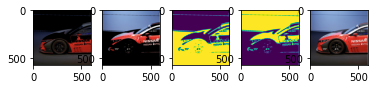

In [ ]:
#
#Check "acura's 30th post.png" to see whether extractions of foreground & background work
#This is the attempt to generate data by always convert image back to default BGR before calculations

#read the image
image = cv2.imread("/content/pics/nissan's 836th post.png") #in BGR mode
imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Convert it back to RGB(original color mode)

#converting image to grayscale format
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

ret, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#apply AND operation on image and mask generated by thrresholding
mask_inverse = cv2.bitwise_not(mask)
#For display convenience, I convert the pic format from default BGR to RGB(correspond to image and imageRGB)
background = cv2.bitwise_and(imageRGB, imageRGB ,mask=mask_inverse)
foreground = cv2.bitwise_and(imageRGB, imageRGB,mask=mask)

#1. For calculation, convert RGB back to BGR
foreC = image_colorfulness(foreground)
backC = image_colorfulness(background)
fgBGR = cv2.cvtColor(foreground, cv2.COLOR_RGB2BGR)
bgBGR = cv2.cvtColor(background, cv2.COLOR_RGB2BGR)
differenceForeBack = foreC-backC
#foreground & background hue, and 'f hue-b hue'
#foreground & background saturation, and 'f satu-b satu'
#foreground & background value, and 'f value-b value'
f_hsv = cv2.cvtColor(fgBGR, cv2.COLOR_BGR2HSV)
b_hsv = cv2.cvtColor(bgBGR, cv2.COLOR_BGR2HSV)

#change
f_hue = f_hsv[:,:,0].mean()
b_hue = b_hsv[:,:,0].mean()
fb_hueDifference = f_hue-b_hue
f_saturation = f_hsv[:, :, 1].mean()
b_saturation = b_hsv[:, :, 1].mean()
fb_saturationDifference = f_saturation-b_saturation
f_value = f_hsv[:,:,2].mean()
b_value = b_hsv[:,:,2].mean()
fb_value = f_value-b_value

'''
HSV = rgb2hsv(YourRGBImage);
H = HSV(:,:,1);
S = HSV(:,:,2);
V = HSV(:,:,3); '''

    #capturing HSV
img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hue = img_hsv[:,:,0].mean()
saturation = img_hsv[:, :, 1].mean()
value = img_hsv[:,:,2].mean()
C = image_colorfulness(image)

 #value = img_hsv[1,1,:].mean()

# add the image metrics to the results list
data.append([hue, saturation, value, C,foreC, backC, differenceForeBack,
                  f_hue, b_hue, fb_hueDifference, f_saturation, b_saturation, fb_saturationDifference,
                    f_value, b_value, fb_value ])
print(data)
print("f_hue:", f_hue)
print("b_hue:",b_hue)
print("f_saturation", f_saturation)
print("b_saturation", b_saturation)
print("f_value", f_value)
print("b_value", b_value)

#plot the result
f, axarr = plt.subplots(1,5)
axarr[0].imshow(foreground)
axarr[1].imshow(background)
axarr[2].imshow(mask) #yellow part is foreground, dark part is mask
axarr[3].imshow(mask_inverse) #yellow part is background, dark part is mask_inverse
axarr[4].imshow(imageRGB)


#83.02120141342756, 102.49665551839465, 134.33333333333334, 72.45704810018123, 43.01888985890224, 58.77500710483831, -15.756117245936068, 39.542402826855124, 43.47879858657244, -3.936395759717314, 0.0, 102.49665551839465, -102.49665551839465, 0.0, 134.33333333333334, -134.33333333333334]]

# Example of analyzing Ramtrucks's 246th image with the program above
Sequence of pictures:
1. foreground
2. background
3. foreground contrast
4. background contrast
5. the original picture

[[26.447991532057213, 73.15089897767973, 157.2220996702958, 36.420704636302084, 11.420902236603112, 40.43941982597262, -29.01851758936951, 9.68367074645983, 16.76432078559738, -7.08065003913755, 17.145692497450128, 56.00520648022961, -38.85951398277948, 10.92253136933988, 146.2995683009559, -135.37703693161603]]
f_hue: 9.68367074645983
b_hue: 16.76432078559738
f_saturation 17.145692497450128
b_saturation 56.00520648022961
f_value 10.92253136933988
b_value 146.2995683009559


'\nf_hue: 33.92718661734639\nb_hue: 44.25160133306546\nf_saturation 48.20206046066393\nb_saturation 49.752478816313506\nf_value 34.81400900528263\nb_value 93.15990285640001'

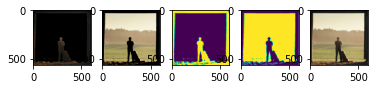

In [ ]:
#Example of ramtrucks's 246th post

image = cv2.imread("/content/pics/ramtrucks's 246th post.png") #in BGR mode
imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Convert it back to RGB(original color mode)

#converting image to grayscale format
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

ret, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#apply AND operation on image and mask generated by thrresholding, cv2.THRESH_BINARY_INV+
mask_inverse = cv2.bitwise_not(mask)
#For display convenience, I convert the pic format from default BGR to RGB(correspond to image and imageRGB)
background = cv2.bitwise_and(imageRGB, imageRGB ,mask=mask_inverse)
foreground = cv2.bitwise_and(imageRGB, imageRGB,mask=mask)

#1. For calculation, convert RGB back to BGR
foreC = image_colorfulness(foreground)
backC = image_colorfulness(background)
fgBGR = cv2.cvtColor(foreground, cv2.COLOR_RGB2BGR)
bgBGR = cv2.cvtColor(background, cv2.COLOR_RGB2BGR)
differenceForeBack = foreC-backC
#foreground & background hue, and 'f hue-b hue'
#foreground & background saturation, and 'f satu-b satu'
#foreground & background value, and 'f value-b value'
f_hsv = cv2.cvtColor(fgBGR, cv2.COLOR_BGR2HSV)
b_hsv = cv2.cvtColor(bgBGR, cv2.COLOR_BGR2HSV)

#change
f_hue = f_hsv[:,:,0].mean()
b_hue = b_hsv[:,:,0].mean()
fb_hueDifference = f_hue-b_hue
f_saturation = f_hsv[:, :, 1].mean()
b_saturation = b_hsv[:, :, 1].mean()
fb_saturationDifference = f_saturation-b_saturation
f_value = f_hsv[:,:,2].mean()
b_value = b_hsv[:,:,2].mean()
fb_value = f_value-b_value

'''
HSV = rgb2hsv(YourRGBImage);
H = HSV(:,:,1);
S = HSV(:,:,2);
V = HSV(:,:,3); '''

    #capturing HSV
img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hue = img_hsv[:,:,0].mean()
saturation = img_hsv[:, :, 1].mean()
value = img_hsv[:,:,2].mean()
C = image_colorfulness(image)

 #value = img_hsv[1,1,:].mean()

# add the image metrics to the results list
data.append([hue, saturation, value, C,foreC, backC, differenceForeBack,
                  f_hue, b_hue, fb_hueDifference, f_saturation, b_saturation, fb_saturationDifference,
                    f_value, b_value, fb_value ])
print(data)
print("f_hue:", f_hue)
print("b_hue:",b_hue)
print("f_saturation", f_saturation)
print("b_saturation", b_saturation)
print("f_value", f_value)
print("b_value", b_value)

#plot the result
f, axarr = plt.subplots(1,5)
axarr[0].imshow(foreground)
axarr[1].imshow(background)
axarr[2].imshow(mask) #yellow part is foreground, dark part is mask
axarr[3].imshow(mask_inverse) #yellow part is background, dark part is mask_inverse
axarr[4].imshow(imageRGB)


# Example of analyzing Hyundaiusa's 84th image with the program above
Sequence of pictures:
1. foreground
2. background
3. foreground contrast
4. background contrast
5. the original picture

Colorfulness: 26.039222749765468
foreC: 18.10445538385516
backC: 16.956575765951243
f_hue: 19.107218502196094
b_hue: 61.92503548681971
f_saturation 18.486671076198192
b_saturation 9.838328738006942
f_value 18.82686147877851
b_value 155.2878111135058


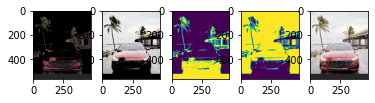

In [ ]:
#Example of hyundaiusa's 84th post
image = cv2.imread("/content/pics/hyundaiusa's 84th post.png") #in BGR mode
imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Convert it back to RGB(original color mode)

#converting image to grayscale format
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

ret, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#apply AND operation on image and mask generated by thrresholding, cv2.THRESH_BINARY_INV+
mask_inverse = cv2.bitwise_not(mask)
#For display convenience, I convert the pic format from default BGR to RGB(correspond to image and imageRGB)
background = cv2.bitwise_and(imageRGB, imageRGB ,mask=mask_inverse)
foreground = cv2.bitwise_and(imageRGB, imageRGB,mask=mask)

#1. For calculation, convert RGB back to BGR
foreC = image_colorfulness(foreground)
backC = image_colorfulness(background)
fgBGR = cv2.cvtColor(foreground, cv2.COLOR_RGB2BGR)
bgBGR = cv2.cvtColor(background, cv2.COLOR_RGB2BGR)
differenceForeBack = foreC-backC
#foreground & background hue, and 'f hue-b hue'
#foreground & background saturation, and 'f satu-b satu'
#foreground & background value, and 'f value-b value'
f_hsv = cv2.cvtColor(fgBGR, cv2.COLOR_BGR2HSV)
b_hsv = cv2.cvtColor(bgBGR, cv2.COLOR_BGR2HSV)

#change
f_hue = f_hsv[:,:,0].mean()
b_hue = b_hsv[:,:,0].mean()
fb_hueDifference = f_hue-b_hue
f_saturation = f_hsv[:, :, 1].mean()
b_saturation = b_hsv[:, :, 1].mean()
fb_saturationDifference = f_saturation-b_saturation
f_value = f_hsv[:,:,2].mean()
b_value = b_hsv[:,:,2].mean()
fb_value = f_value-b_value


#capturing HSV
img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hue = img_hsv[:,:,0].mean()
saturation = img_hsv[:,:,1].mean()
value = img_hsv[:,:,2].mean()
C = image_colorfulness(image)

# add the image metrics to the results list
data.append([hue, saturation, value, C,foreC, backC, differenceForeBack,
                  f_hue, b_hue, fb_hueDifference, f_saturation, b_saturation, fb_saturationDifference,
                    f_value, b_value, fb_value ])
##pprint(data)
print("Colorfulness:",C)
print("foreC:",foreC)
print("backC:",backC)
print("f_hue:", f_hue)
print("b_hue:",b_hue)
print("f_saturation", f_saturation)
print("b_saturation", b_saturation)
print("f_value", f_value)
print("b_value", b_value)

#plot the result
f, axarr = plt.subplots(1,5)
axarr[0].imshow(foreground)
axarr[1].imshow(background)
axarr[2].imshow(mask) #yellow part is foreground, dark part is mask
axarr[3].imshow(mask_inverse) #yellow part is background, dark part is mask_inverse
axarr[4].imshow(imageRGB)